In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
# Paramaters for query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key = api_key

# Build partial query URL - without city
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []
city_count = []

# set up a counter to print out
counter = 0

# print the start of the API call
print("Beginning Data Retrieval")

# Loop through the list of cities and retrieve data on cloudiness, country, 
# date, humidity, lat, lng , Max Temperature, and Wind Speed
for city in cities:
    try:
        counter += 1
        print(f"processing record {counter} | {city}")
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        city_count.append(response['name'])
    except Exception as e:
        print("error type: {}. error value: {}".format(type(e), e))

Beginning Data Retrieval
processing record 1 | busselton
processing record 2 | saldanha
processing record 3 | nanortalik
processing record 4 | tadine
processing record 5 | goderich
processing record 6 | bandarbeyla
processing record 7 | west wendover
processing record 8 | butaritari
processing record 9 | marcona
error type: <class 'KeyError'>. error value: 'clouds'
processing record 10 | taolanaro
error type: <class 'KeyError'>. error value: 'clouds'
processing record 11 | chokurdakh
processing record 12 | barrow
processing record 13 | castro
processing record 14 | bredasdorp
processing record 15 | mataura
processing record 16 | half moon bay
processing record 17 | vaini
processing record 18 | tasiilaq
processing record 19 | platanos
processing record 20 | nizwa
processing record 21 | kieta
processing record 22 | khatanga
processing record 23 | yellowknife
processing record 24 | hobyo
processing record 25 | slave lake
processing record 26 | mys shmidta
error type: <class 'KeyError'>. e

processing record 203 | georgetown
processing record 204 | esmeralda
processing record 205 | port blair
processing record 206 | eureka
processing record 207 | nampa
processing record 208 | santa cruz
processing record 209 | lesnoye
processing record 210 | viedma
processing record 211 | ilulissat
processing record 212 | itarema
processing record 213 | pevek
processing record 214 | dingle
processing record 215 | zhezkazgan
processing record 216 | moyale
processing record 217 | santa catarina de tepehuanes
processing record 218 | nome
processing record 219 | saskylakh
processing record 220 | vestmannaeyjar
processing record 221 | pala
processing record 222 | koulikoro
processing record 223 | sao filipe
processing record 224 | dera ghazi khan
processing record 225 | biankouma
processing record 226 | beringovskiy
processing record 227 | maragogi
processing record 228 | mineros
processing record 229 | diego de almagro
processing record 230 | ahipara
processing record 231 | sargatskoye
proces

processing record 421 | toppenish
processing record 422 | mercedes
processing record 423 | torbay
processing record 424 | brindisi
processing record 425 | russell
processing record 426 | sao joao da barra
processing record 427 | kayseri
processing record 428 | leopold
processing record 429 | kui buri
processing record 430 | kankon
processing record 431 | narsaq
processing record 432 | oancea
processing record 433 | gazanjyk
processing record 434 | mutoko
processing record 435 | ola
processing record 436 | tuatapere
processing record 437 | ayr
processing record 438 | vostok
processing record 439 | lagoa
processing record 440 | pacific grove
processing record 441 | biu
processing record 442 | wanaka
processing record 443 | ratnagiri
processing record 444 | boyolangu
processing record 445 | chara
processing record 446 | nileshwar
processing record 447 | alabaster
processing record 448 | airai
processing record 449 | miles city
processing record 450 | woodward
processing record 451 | puert

In [5]:
# create a dictionary from the output lists above
city_dict = {
    'City':city_count, 
    'Cloudiness':cloudiness, 
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Latitude':lat,
    'Longitude':lng,
    'Max Temp':maxTemp,
    'Wind Speed':windSpeed
}

In [15]:
# create a dataframe from the dictionary I created
city_df = pd.DataFrame(city_dict)
city_df.head()

# Output File (CSV)
city_df.to_csv("cities.csv")

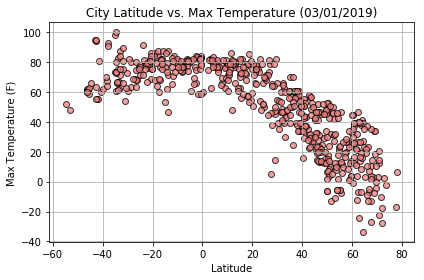

In [16]:
# Scatter plot for Latitude vs. Temperature Plot
plt.scatter(city_df['Latitude'], 
            city_df['Max Temp'], 
            facecolor = "lightcoral", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("Latitude_vs_Temp.png")

# format the chart and print it out
plt.tight_layout()
plt.show()

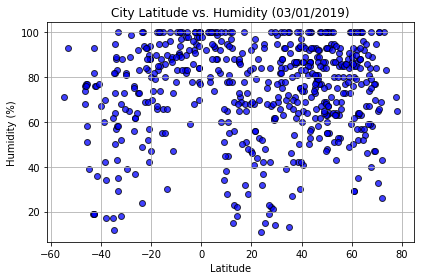

In [17]:
# Scatter plot for City Latitude vs Humidity
plt.scatter(city_df['Latitude'], 
            city_df['Humidity'], 
            facecolor = "blue", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# format the chart and print it out
plt.tight_layout()
plt.show()

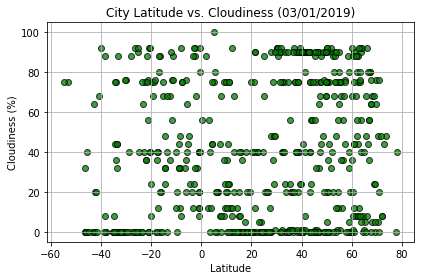

In [18]:
# Scatter plot for City Latitude vs Cloudiness
plt.scatter(city_df['Latitude'], 
            city_df['Cloudiness'], 
            facecolor = "green", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# format the chart and print it out
plt.tight_layout()
plt.show()

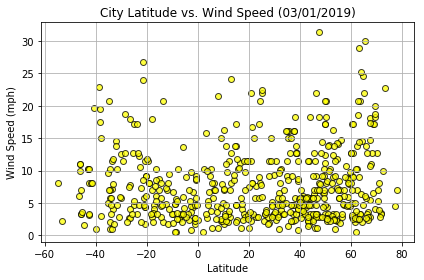

In [19]:
# Scatter plot for City Latitude vs Wind Speed
plt.scatter(city_df['Latitude'], 
            city_df['Wind Speed'], 
            facecolor = "yellow", 
            edgecolor = "k",
            alpha = 0.75
    )
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# format the chart and print it out
plt.tight_layout()
plt.show()

### Analysis
* Max Temperature is much higher at the equator (0 degrees latitude). Also, cities in the southern hemisphere seem to be much higher in general than cities in the northern hemisphere.
* There is no strong relationship between humidity and latitude as many cities below, at, or above the equator have an equal amount. 
* There is no strong relationship between Wind Speed and Latitude. However, there seem to be more cities in the northern hemisphere that have more than 20 MPH Wind Speed.
* Also, there is no relationship between cloudiness and Latitude as well. However, Most cities seem to have a high amount or low amount of overall cloudiness.